In [1]:
#import library/packages 
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('/content/imdb_master.csv', encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values 

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [17]:
df.head(1)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt


In [16]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [4]:
#tokenizing data 
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
#sentences = tokenizer.texts_to_matrix(sentences)

In [5]:
#preparing data for embedding layer
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs = pad_sequences(sentences,maxlen=max_review_len)

In [6]:
le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state = 1000) #traning data
X_train.shape,y_train.shape

((75000, 2470), (75000,))

In [10]:
#number of features 
input_dim = 2470
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))

model.add(Flatten())
model.add(layers.Dense(300, input_dim = input_dim,activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
model.summary() #getting the summary of my model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2470, 50)          8820400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 123500)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               37050300  
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 45,871,603
Trainable params: 45,871,603
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 451s 2s/step - loss: 1.5018 - acc: 0.4744 - val_loss: 0.8753 - val_acc: 0.5010
Epoch 2/5
293/293 [==============================] - 453s 2s/step - loss: 0.8480 - acc: 0.5171 - val_loss: 0.8543 - val_acc: 0.5026
Epoch 3/5
293/293 [==============================] - 452s 2s/step - loss: 0.7892 - acc: 0.5608 - val_loss: 0.8558 - val_acc: 0.5015
Epoch 4/5
293/293 [==============================] - 452s 2s/step - loss: 0.7040 - acc: 0.6425 - val_loss: 0.9072 - val_acc: 0.4947
Epoch 5/5
293/293 [==============================] - 454s 2s/step - loss: 0.5690 - acc: 0.7408 - val_loss: 1.0150 - val_acc: 0.4866


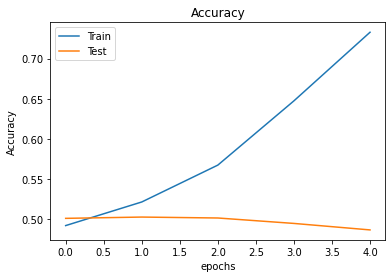

In [13]:
plt.figure()
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

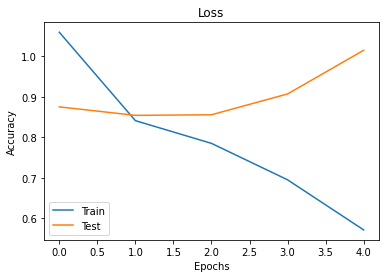

In [14]:
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()